In [80]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Idioms

In [5]:
df = pd.DataFrame({'aaa':[4, 5, 6, 7], 
                   'bbb':[10, 20, 30, 40], 
                   'ccc':[100, 50, -30, -50]})

In [6]:
df

,aaa,bbb,ccc
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


## if-then

#### An if-then on one column

In [7]:
df.loc[df.aaa >= 5, 'bbb'] = -1
df

,aaa,bbb,ccc
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


#### An if-then with assignment to 2 columns:

In [8]:
df.loc[df.aaa >= 5, ['bbb', 'ccc']] = 555
df

,aaa,bbb,ccc
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


#### Add another line with different logic, to do the -else

In [9]:
df.loc[df.aaa < 5, ['bbb', 'ccc']] = 2000 
df

,aaa,bbb,ccc
0,4,2000,2000
1,5,555,555
2,6,555,555
3,7,555,555


#### Or use pandas where after you’ve set up a mask

In [11]:
df_mask = pd.DataFrame({'aaa':[True]*4,
                       'bbb':[False]*4,
                       'ccc':[True, False]*2})
df.where(df_mask, -1000)

,aaa,bbb,ccc
0,4,-1000,2000
1,5,-1000,-1000
2,6,-1000,555
3,7,-1000,-1000


#### if-then-else using numpy’s where()

In [12]:
df = pd.DataFrame({'aaa':[4, 5, 6, 7], 
                   'bbb':[10, 20, 30, 40], 
                   'ccc':[100, 50, -30, -50]})
df

,aaa,bbb,ccc
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [13]:
df['logic'] = np.where(df['aaa'] > 5, 'high', 'low')
df

,aaa,bbb,ccc,logic
0,4,10,100,low
1,5,20,50,low
2,6,30,-30,high
3,7,40,-50,high


## Splitting

#### Split a frame with a boolean criterion

In [25]:
df = pd.DataFrame({'aaa':[4, 5, 6, 7], 
                   'bbb':[10, 20, 30, 40], 
                   'ccc':[100, 50, -30, -50]})
df

,aaa,bbb,ccc
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [16]:
dflow = df[df.aaa <= 5]
dflow

,aaa,bbb,ccc
0,4,10,100
1,5,20,50


In [18]:
dfhigh = df[df.aaa > 5]
dfhigh

,aaa,bbb,ccc
2,6,30,-30
3,7,40,-50


## Building Criteria

#### Select with multi-column criteria

In [19]:
df

,aaa,bbb,ccc
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [20]:
new_df = df.loc[(df['bbb'] < 25) & (df['ccc'] >= -40), 'aaa']
new_df

0    4
1    5
Name: aaa, dtype: int64

In [21]:
new_df1 = df.loc[(df['bbb'] < 25) | (df['ccc'] >= -40), 'aaa']
new_df1

0    4
1    5
2    6
Name: aaa, dtype: int64

In [26]:
df.loc[(df['bbb'] > 25) | (df['ccc'] >= 75), 'aaa'] = 0.1
df

,aaa,bbb,ccc
0,0.1,10,100
1,5.0,20,50
2,0.1,30,-30
3,0.1,40,-50


#### Select rows with data closest to certain value using argsort

In [27]:
df = pd.DataFrame({'aaa':[4, 5, 6, 7], 
                   'bbb':[10, 20, 30, 40], 
                   'ccc':[100, 50, -30, -50]})
df

,aaa,bbb,ccc
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [28]:
aValue = 43.0

df.loc[(df.ccc - aValue).abs().argsort()]

,aaa,bbb,ccc
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


#### Dynamically reduce a list of criteria using a binary operators

In [29]:
df = pd.DataFrame({'aaa':[4, 5, 6, 7], 
                   'bbb':[10, 20, 30, 40], 
                   'ccc':[100, 50, -30, -50]})


In [32]:
crit1 = df.aaa <= 5.5
crit2 = df.bbb == 10.0
crit3 = df.ccc > -40.0

allCrit = crit1 & crit2 & crit3
df[allCrit]

,aaa,bbb,ccc
0,4,10,100


Or,

In [36]:
critList = [crit1, crit2, crit3]

import functools
allCrit1 = functools.reduce(lambda x, y: x&y, critList)

df[allCrit1]

,aaa,bbb,ccc
0,4,10,100


# Selection

## DataFrames

#### Using both row labels and value conditionals

In [37]:
df

,aaa,bbb,ccc
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [38]:
df[(df.aaa <= 6) & (df.index.isin([0, 2, 4]))]

,aaa,bbb,ccc
0,4,10,100
2,6,30,-30


#### Use loc for label-oriented slicing and iloc positional slicing

In [39]:
data = {'aaa':[4, 5, 6, 7], 
        'bbb':[10, 20, 30, 40], 
        'ccc':[100, 50, -30, -50]}

df = pd.DataFrame(data = data, index = ['foo', 'bar', 'boo', 'kar'])
df

,aaa,bbb,ccc
foo,4,10,100
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


There are 2 explicit slicing methods, with a third general case

1. Positional-oriented (Python slicing style : exclusive of end)
2. Label-oriented (Non-Python slicing style : inclusive of end)
3. General (Either slicing style : depends on if the slice contains labels or positions)

In [42]:
df.loc['bar':'kar'] # label: inclusive of end


,aaa,bbb,ccc
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [43]:
# Generic

df.iloc[0:3]   # positional: exclusive of end

,aaa,bbb,ccc
foo,4,10,100
bar,5,20,50
boo,6,30,-30


Ambiguity arises when an index consists of integers with a non-zero start or non-unit increment.

In [45]:
df2 = pd.DataFrame(data=data, index=[1, 2, 3, 4])
df2

,aaa,bbb,ccc
1,4,10,100
2,5,20,50
3,6,30,-30
4,7,40,-50


In [49]:
# positional
df2.iloc[1:3]

,aaa,bbb,ccc
2,5,20,50
3,6,30,-30


In [50]:
# label
df2.loc[1:3]

,aaa,bbb,ccc
1,4,10,100
2,5,20,50
3,6,30,-30


#### Using inverse operator (~) to take the complement of a mask

In [53]:
df = pd.DataFrame(data=data)
df

,aaa,bbb,ccc
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [54]:
df[~((df.aaa <= 6) & (df.index.isin([0, 2, 4])))]

,aaa,bbb,ccc
1,5,20,50
3,7,40,-50


## Panels 
**Panel, Represents wide format panel data, stored as 3-dimensional array**

#### Extend a panel frame by transposing, adding a new dimension, and transposing back to the original dimensions

In [56]:
rng = pd.date_range('1/1/2018', periods=100, freq='D')


In [58]:
data = np.random.randn(100, 4)


In [59]:
cols = ['a', 'b', 'c', 'd']

df1, df2, df3 = pd.DataFrame(data, rng, cols), pd.DataFrame(data, rng, cols), pd.DataFrame(data, rng, cols)

In [60]:
pf = pd.Panel({'df1':df1, 'df2':df2, 'df3':df3})
pf

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 100 (major_axis) x 4 (minor_axis)
Items axis: df1 to df3
Major_axis axis: 2018-01-01 00:00:00 to 2018-04-10 00:00:00
Minor_axis axis: a to d

In [63]:
pf.loc[:, :, 'f'] = pd.DataFrame(data, rng, cols)
pf

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 100 (major_axis) x 6 (minor_axis)
Items axis: df1 to df3
Major_axis axis: 2018-01-01 00:00:00 to 2018-04-10 00:00:00
Minor_axis axis: a to f

## New Columns

#### Efficiently and dynamically creating new columns using applymap

In [64]:
df = pd.DataFrame({'aaa':[1, 2, 1, 3],
                  'bbb':[1, 1, 2, 2], 
                  'ccc':[2, 1, 3, 1]})
df

,aaa,bbb,ccc
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [65]:
source_cols = df.columns
source_cols

Index(['aaa', 'bbb', 'ccc'], dtype='object')

In [66]:
new_cols = [str(x) + '_cat' for x in source_cols]
new_cols

['aaa_cat', 'bbb_cat', 'ccc_cat']

In [67]:
categories = {1:'Alpha', 2:'Beta', 3:'Theta'}

df[new_cols] = df[source_cols].applymap(categories.get)
df

,aaa,bbb,ccc,aaa_cat,bbb_cat,ccc_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Theta
3,3,2,1,Theta,Beta,Alpha


#### Keep other columns when using min() with groupby

In [68]:
df = pd.DataFrame({'aaa' : [1,1,1,2,2,2,3,3], 
                   'bbb' : [2,1,3,4,5,1,2,3]})
df


,aaa,bbb
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


**Method 1 : idxmin() to get the index of the mins**

In [69]:
df.loc[df.groupby('aaa')['bbb'].idxmin()]

,aaa,bbb
1,1,1
5,2,1
6,3,2


**Method 2 : sort then take first of each**

In [75]:
df.sort_values(by='bbb').groupby('aaa', as_index=False).first()

,aaa,bbb
0,1,1
1,2,1
2,3,2


# MultiIndexing

### Creating a multi-index from a labeled frame

In [76]:
df = pd.DataFrame({'row' : [0,1,2],
                   'One_X' : [1.1,1.1,1.1],
                   'One_Y' : [1.2,1.2,1.2],
                   'Two_X' : [1.11,1.11,1.11],
                   'Two_Y' : [1.22,1.22,1.22]})
df

,One_X,One_Y,Two_X,Two_Y,row
0,1.1,1.2,1.11,1.22,0
1,1.1,1.2,1.11,1.22,1
2,1.1,1.2,1.11,1.22,2


##### As Labelled Index

In [77]:
df = df.set_index('row')
df

,One_X,One_Y,Two_X,Two_Y
row,,,,
0,1.1,1.2,1.11,1.22
1,1.1,1.2,1.11,1.22
2,1.1,1.2,1.11,1.22


##### With Hierarchical Columns

In [79]:

df.columns = pd.MultiIndex.from_tuples([tuple(c.split('_')) for c in df.columns])

df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

#### Now stack & Reset


In [83]:
df = df.stack(0).reset_index(1)
df

,level_1,X,Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


##### And fix the labels (Notice the label 'level_1' got added automatically)

In [85]:
df.columns = ['Sample', 'All_X', 'All_Y']
df

,Sample,All_X,All_Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


## Arithmetic

### Performing arithmetic with a multi-index that needs broadcasting

In [87]:
cols = pd.MultiIndex.from_tuples([(x, y) for x in ['a', 'b', 'c'] for y in ['o', 'i']])
cols

MultiIndex(levels=[['a', 'b', 'c'], ['i', 'o']],
           labels=[[0, 0, 1, 1, 2, 2], [1, 0, 1, 0, 1, 0]])

In [89]:
df = pd.DataFrame(np.random.randn(2, 6), index=['n', 'm'], columns=cols)
df

a                   b                   c          
          o         i         o         i         o         i
n  0.503965 -0.646307 -0.824822  0.585019 -0.083426 -0.618826
m  0.199476 -0.045340  1.117843 -0.026342  0.379446  1.576816

In [90]:
df = df.div(df['c'], level=1)
df


a                   b              c     
          o         i         o         i    o    i
n -6.040849  1.044410  9.886844 -0.945370  1.0  1.0
m  0.525703 -0.028754  2.945987 -0.016706  1.0  1.0

## Slicing

#### Slicing a multi-index with xs

In [91]:
coords = [('AA','one'),('AA','six'),('BB','one'),('BB','two'),('BB','six')]

index = pd.MultiIndex.from_tuples(coords)

df = pd.DataFrame([11,22,33,44,55],index,['MyData'])
df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

#### To take the cross section of the 1st level and 1st axis the index:

In [92]:
df.xs('BB',level=0,axis=0)  #Note : level and axis are optional, and default to zero


,MyData
one,33
two,44
six,55


#### ...and now the 2nd level of the 1st axis.

In [94]:
df.xs('six', level=1, axis=0)

,MyData
AA,22
BB,55


#### Slicing a multi-index with xs, method #2

In [97]:
import itertools

index = list(itertools.product(['Ada','Quinn','Violet'],['Comp','Math','Sci']))

headr = list(itertools.product(['Exams','Labs'],['I','II']))

indx = pd.MultiIndex.from_tuples(index,names=['Student','Course'])

cols = pd.MultiIndex.from_tuples(headr) #Notice these are un-named

data = [[70+x+y+(x*y)%3 for x in range(4)] for y in range(9)]

df = pd.DataFrame(data,indx,cols)

df


Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [98]:
All = slice(None)

In [99]:
df.loc['Violet']

Exams     Labs    
           I  II    I  II
Course                   
Comp      76  77   78  79
Math      77  79   81  80
Sci       78  81   81  81

In [100]:
df.loc[(All, 'Math'), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77
Violet  Math      77  79   81  80

In [101]:
df.loc[(slice('Ada', 'Quinn'), 'Math'), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77

In [102]:
df.loc[(All, 'Math'), ('Exams')]

,,I,II
Student,Course,,
Ada,Math,71,73
Quinn,Math,74,76
Violet,Math,77,79


In [103]:
df.loc[(All, 'Math'), (All, 'II')]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


## Sorting

#### Sort by specific column or an ordered list of columns, with a multi-index

In [104]:
df.sort_values(by=('Labs', 'II'), ascending=False)

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

# Missing Data

#### Fill forward a reversed timeseries

In [105]:
df = pd.DataFrame(np.random.randn(6, 1), index=pd.date_range('2018-01-01', periods=6, freq='B'), columns=list('A'))
df

,A
2018-01-01,1.424779
2018-01-02,1.164374
2018-01-03,0.370047
2018-01-04,-1.220232
2018-01-05,0.158259
2018-01-08,0.002067


In [106]:
df.loc[df.index[3], 'A'] = np.nan

In [107]:
df

,A
2018-01-01,1.424779
2018-01-02,1.164374
2018-01-03,0.370047
2018-01-04,NaN
2018-01-05,0.158259
2018-01-08,0.002067


In [109]:
df.reindex(df.index[::-1]).ffill()

,A
2018-01-08,0.002067
2018-01-05,0.158259
2018-01-04,0.158259
2018-01-03,0.370047
2018-01-02,1.164374
2018-01-01,1.424779


#### cumsum reset at NaN values

In [110]:
v = pd.Series([1., 3., 1., np.nan, 1., 1., 1., 1., np.nan, 1.])
v

0    1.0
1    3.0
2    1.0
3    NaN
4    1.0
5    1.0
6    1.0
7    1.0
8    NaN
9    1.0
dtype: float64

In [111]:
cumsum = v.cumsum().fillna(method='pad')
reset = -cumsum[v.isnull()].diff().fillna(cumsum)
result = v.where(v.notnull(), reset).cumsum()
result

0    1.0
1    4.0
2    5.0
3    0.0
4    1.0
5    2.0
6    3.0
7    4.0
8    0.0
9    1.0
dtype: float64

# Grouping

### Basic grouping with apply

Unlike agg, apply’s callable is passed a sub-DataFrame which gives you access to all the columns

In [5]:
df = pd.DataFrame({'animal': 'cat dog cat fish dog cat cat'.split(),
                   'size': list('SSMMMLL'),
                   'weight': [8, 10, 11, 1, 20, 12, 12],
                   'adult' : [False] * 5 + [True] * 2})

df

,adult,animal,size,weight
0,False,cat,S,8
1,False,dog,S,10
2,False,cat,M,11
3,False,fish,M,1
4,False,dog,M,20
5,True,cat,L,12
6,True,cat,L,12


#### List the size of the animals with the highest weight.

In [6]:
df.groupby('animal').apply(lambda subf: subf['size'][subf['weight'].idxmax()])


animal
cat     L
dog     M
fish    M
dtype: object

### Using get_group

In [7]:
gb = df.groupby(['animal'])

gb.get_group('cat')


,adult,animal,size,weight
0,False,cat,S,8
2,False,cat,M,11
5,True,cat,L,12
6,True,cat,L,12


### Apply to different items in a group

In [8]:
def GrowUp(x):
    avg_weight =  sum(x[x['size'] == 'S'].weight * 1.5)
    avg_weight += sum(x[x['size'] == 'M'].weight * 1.25)
    avg_weight += sum(x[x['size'] == 'L'].weight)
    avg_weight /= len(x)
    return pd.Series(['L',avg_weight,True], index=['size', 'weight', 'adult'])



In [9]:
expected_df = gb.apply(GrowUp)
expected_df

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


### Expanding Apply

In [10]:
s = pd.Series([i/100.0 for i in range(1, 11)])
s

0    0.01
1    0.02
2    0.03
3    0.04
4    0.05
5    0.06
6    0.07
7    0.08
8    0.09
9    0.10
dtype: float64

In [11]:
def CumRet(x, y):
    return x*(1+y)

import functools
def Red(x):
    return functools.reduce(CumRet, x, 1.0)

s.expanding().apply(Red)
    

0    1.010000
1    1.030200
2    1.061106
3    1.103550
4    1.158728
5    1.228251
6    1.314229
7    1.419367
8    1.547110
9    1.701821
dtype: float64

### Replacing some values with mean of the rest of a group

In [18]:
df = pd.DataFrame({'A' : [1, 1, 2, 2], 'B' : [1, -1, 1, 2]})

df

,A,B
0,1,1
1,1,-1
2,2,1
3,2,2


In [19]:
gb = df.groupby('A')

def replace(g):
    mask = g < 0
    g.loc[mask] = g[~mask].mean()
    return g

gb.transform(replace)

,B
0,1.0
1,1.0
2,1.0
3,2.0


### Sort groups by aggregated data

In [20]:
df = pd.DataFrame({'code': ['foo', 'bar', 'baz'] * 2,
                   'data': [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],
                   'flag': [False, True] * 3})
df

,code,data,flag
0,foo,0.16,False
1,bar,-0.21,True
2,baz,0.33,False
3,foo,0.45,True
4,bar,-0.59,False
5,baz,0.62,True


In [25]:
gb_code = df.groupby('code')

agg_n_sort = gb_code[['data']].transform(sum).sort_values(by='data')
agg_n_sort

,data
1,-0.80
4,-0.80
0,0.61
3,0.61
2,0.95
5,0.95


In [26]:
sorted_df = df.loc[agg_n_sort.index]
sorted_df

,code,data,flag
1,bar,-0.21,True
4,bar,-0.59,False
0,foo,0.16,False
3,foo,0.45,True
2,baz,0.33,False
5,baz,0.62,True


### Create multiple aggregated columns

In [27]:
rng = pd.date_range(start="2018-01-01", periods=10, freq='2min')

ts = pd.Series(data = list(range(10)), index = rng)
ts

2018-01-01 00:00:00    0
2018-01-01 00:02:00    1
2018-01-01 00:04:00    2
2018-01-01 00:06:00    3
2018-01-01 00:08:00    4
2018-01-01 00:10:00    5
2018-01-01 00:12:00    6
2018-01-01 00:14:00    7
2018-01-01 00:16:00    8
2018-01-01 00:18:00    9
Freq: 2T, dtype: int64

In [28]:
def MyCust(x):
    if(len(x) > 2):
        return x[1]*1.234
    return pd.NaT


In [29]:
mhc = {'Mean':np.mean, 'Max':np.max, 'Custom':MyCust}

ts.resample('5min').apply(mhc)

Custom  2018-01-01 00:00:00    1.234
        2018-01-01 00:05:00      NaT
        2018-01-01 00:10:00    7.404
        2018-01-01 00:15:00      NaT
Max     2018-01-01 00:00:00        2
        2018-01-01 00:05:00        4
        2018-01-01 00:10:00        7
        2018-01-01 00:15:00        9
Mean    2018-01-01 00:00:00        1
        2018-01-01 00:05:00      3.5
        2018-01-01 00:10:00        6
        2018-01-01 00:15:00      8.5
dtype: object

### Create a value counts column and reassign back to the DataFrame

In [30]:
df = pd.DataFrame({'Color': 'Red Red Red Blue'.split(),
                   'Value': [100, 150, 50, 50]})
df

,Color,Value
0,Red,100
1,Red,150
2,Red,50
3,Blue,50


In [31]:
df['Counts'] = df.groupby(['Color']).transform(len)
df

,Color,Value,Counts
0,Red,100,3
1,Red,150,3
2,Red,50,3
3,Blue,50,1


### Shift groups of the values in a column based on the index

In [32]:
df = pd.DataFrame({'line_race': [10, 10, 8, 10, 10, 8],
                   'beyer': [99, 102, 103, 103, 88, 100]},
                  index=[u'Last Gunfighter', u'Last Gunfighter', u'Last Gunfighter',
                         'Paynter', u'Paynter', u'Paynter'])
df

,beyer,line_race
Last Gunfighter,99,10
Last Gunfighter,102,10
Last Gunfighter,103,8
Paynter,103,10
Paynter,88,10
Paynter,100,8


In [33]:
df['beyer_shifted'] = df.groupby(level=0)['beyer'].shift(1)
df

,beyer,line_race,beyer_shifted
Last Gunfighter,99,10,NaN
Last Gunfighter,102,10,99.0
Last Gunfighter,103,8,102.0
Paynter,103,10,NaN
Paynter,88,10,103.0
Paynter,100,8,88.0


### Select row with maximum value from each group

In [35]:
df = pd.DataFrame({'host':['other','other','that','this','this'],
                   'service':['mail','web','mail','mail','web'],
                   'no':[1, 2, 1, 2, 1]}).set_index(['host', 'service'])
df

no
host  service    
other mail      1
      web       2
that  mail      1
this  mail      2
      web       1

In [36]:
mask = df.groupby(level=0).agg('idxmax')
mask

,no
host,
other,"(other, web)"
that,"(that, mail)"
this,"(this, mail)"


In [38]:
df_count = df.loc[mask['no']].reset_index()
df_count

,host,service,no
0,other,web,2
1,that,mail,1
2,this,mail,2


### Grouping like Python’s itertools.groupby

In [39]:
df = pd.DataFrame([0, 1, 0, 1, 1, 1, 0, 1, 1], columns=['A'])
df

,A
0,0
1,1
2,0
3,1
4,1
5,1
6,0
7,1
8,1


In [40]:
df.A.groupby((df.A != df.A.shift()).cumsum()).groups

{1: Int64Index([0], dtype='int64'),
 2: Int64Index([1], dtype='int64'),
 3: Int64Index([2], dtype='int64'),
 4: Int64Index([3, 4, 5], dtype='int64'),
 5: Int64Index([6], dtype='int64'),
 6: Int64Index([7, 8], dtype='int64')}

In [41]:
df.A.groupby((df.A != df.A.shift()).cumsum()).cumsum()

0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    1
8    2
Name: A, dtype: int64

## Splitting

### Splitting a frame
Create a list of dataframes, split using a delineation based on logic included in rows.

In [43]:
df = pd.DataFrame(data={'Case' : ['A','A','A','B','A','A','B','A','A'],
                        'Data' : np.random.randn(9)})
df

,Case,Data
0,A,-1.211903
1,A,0.085516
2,A,-0.432667
3,B,-1.201708
4,A,1.905939
5,A,0.105513
6,B,-0.161293
7,A,-0.039956
8,A,0.527075


In [44]:
dfs = list(zip(*df.groupby((1*(df['Case']=='B')).cumsum().rolling(window=3, min_periods=1).median())))[-1]
dfs

(  Case      Data
 0    A -1.211903
 1    A  0.085516
 2    A -0.432667
 3    B -1.201708,   Case      Data
 4    A  1.905939
 5    A  0.105513
 6    B -0.161293,   Case      Data
 7    A -0.039956
 8    A  0.527075)

In [45]:
dfs[0]

,Case,Data
0,A,-1.211903
1,A,0.085516
2,A,-0.432667
3,B,-1.201708


In [46]:
dfs[1]

,Case,Data
4,A,1.905939
5,A,0.105513
6,B,-0.161293


In [48]:
dfs[2]

,Case,Data
7,A,-0.039956
8,A,0.527075


## Pivot

### Partial sums and subtotals

In [50]:
df = pd.DataFrame(data={'Province' : ['ON','QC','BC','AL','AL','MN','ON'],
                       'City' : ['Toronto','Montreal','Vancouver','Calgary','Edmonton','Winnipeg','Windsor'],
                       'Sales' : [13,6,16,8,4,3,1]})
df

,City,Province,Sales
0,Toronto,ON,13
1,Montreal,QC,6
2,Vancouver,BC,16
3,Calgary,AL,8
4,Edmonton,AL,4
5,Winnipeg,MN,3
6,Windsor,ON,1


In [52]:
table = pd.pivot_table(df, values=['Sales'], index=['Province'], columns=['City'], aggfunc=np.sum, margins=True)

table

Sales                                                           
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg   All
Province                                                                   
AL           8.0      4.0      NaN     NaN       NaN     NaN      NaN  12.0
BC           NaN      NaN      NaN     NaN      16.0     NaN      NaN  16.0
MN           NaN      NaN      NaN     NaN       NaN     NaN      3.0   3.0
ON           NaN      NaN      NaN    13.0       NaN     1.0      NaN  14.0
QC           NaN      NaN      6.0     NaN       NaN     NaN      NaN   6.0
All          8.0      4.0      6.0    13.0      16.0     1.0      3.0  51.0

In [53]:
table.stack('City')

Sales
Province City            
AL       All         12.0
         Calgary      8.0
         Edmonton     4.0
BC       All         16.0
         Vancouver   16.0
MN       All          3.0
         Winnipeg     3.0
ON       All         14.0
         Toronto     13.0
         Windsor      1.0
QC       All          6.0
         Montreal     6.0
All      All         51.0
         Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0

### Frequency table like plyr in R

In [54]:
grades = [48,99,75,80,42,80,72,68,36,78]

df = pd.DataFrame( {'ID': ["x%d" % r for r in range(10)],
                    'Gender' : ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'M'],
                    'ExamYear': ['2007','2007','2007','2008','2008','2008','2008','2009','2009','2009'],
                    'Class': ['algebra', 'stats', 'bio', 'algebra', 'algebra', 'stats', 'stats', 'algebra', 'bio', 'bio'],
                    'Participated': ['yes','yes','yes','yes','no','yes','yes','yes','yes','yes'],
                    'Passed': ['yes' if x > 50 else 'no' for x in grades],'Employed': [True,True,True,False,False,False,False,True,True,False],
                    'Grade': grades})
df


,Class,Employed,ExamYear,Gender,Grade,ID,Participated,Passed
0,algebra,True,2007,F,48,x0,yes,no
1,stats,True,2007,M,99,x1,yes,yes
2,bio,True,2007,F,75,x2,yes,yes
3,algebra,False,2008,M,80,x3,yes,yes
4,algebra,False,2008,F,42,x4,no,no
5,stats,False,2008,M,80,x5,yes,yes
6,stats,False,2008,F,72,x6,yes,yes
7,algebra,True,2009,M,68,x7,yes,yes
8,bio,True,2009,M,36,x8,yes,no
9,bio,False,2009,M,78,x9,yes,yes


In [55]:
df.groupby('ExamYear').agg({'Participated': lambda x: x.value_counts()['yes'],
                            'Passed': lambda x: sum(x == 'yes'),
                            'Employed' : lambda x : sum(x),
                            'Grade' : lambda x : sum(x) / len(x)})


,Participated,Employed,Passed,Grade
ExamYear,,,,
2007,3,3,2,74.000000
2008,3,0,3,68.500000
2009,3,2,2,60.666667


### Plot pandas DataFrame with year over year data

In [56]:
df = pd.DataFrame({'value': np.random.randn(36)},
                  index=pd.date_range('2011-01-01', freq='M', periods=36))
df

,value
2011-01-31,-2.146448
2011-02-28,0.418794
2011-03-31,-0.906892
2011-04-30,0.264375
2011-05-31,-0.621589
2011-06-30,-0.117639
2011-07-31,0.809897
2011-08-31,-1.621004
2011-09-30,-0.831126
2011-10-31,-0.908893


In [57]:
 pd.pivot_table(df, index=df.index.month, columns=df.index.year,
                values='value', aggfunc='sum')
    

,2011,2012,2013
1,-2.146448,-0.556409,-0.714951
2,0.418794,1.350318,-0.192040
3,-0.906892,1.113386,-0.375249
4,0.264375,-2.663082,-0.097162
5,-0.621589,-0.509286,0.527871
6,-0.117639,-0.340484,-0.247023
7,0.809897,1.104961,3.016085
8,-1.621004,-0.273860,0.032568
9,-0.831126,2.865043,0.664214
10,-0.908893,0.677598,0.102533


## Apply

### Rolling Apply to Organize - Turning embedded lists into a multi-index frame

In [58]:
df = pd.DataFrame(data={'A' : [[2,4,8,16],[100,200],[10,20,30]], 'B' : [['a','b','c'],['jj','kk'],['ccc']]},index=['I','II','III'])
df

,A,B
I,"[2, 4, 8, 16]","[a, b, c]"
II,"[100, 200]","[jj, kk]"
III,"[10, 20, 30]",[ccc]


In [62]:
def SeriesFromSubList(aList):
    return pd.Series(aList)

import itertools
df_org = pd.concat(dict([(ind, row.apply(SeriesFromSubList)) for ind, row in df.iterrows()]))

df_org

0    1    2     3
I   A    2    4    8  16.0
    B    a    b    c   NaN
II  A  100  200  NaN   NaN
    B   jj   kk  NaN   NaN
III A   10   20   30   NaN
    B  ccc  NaN  NaN   NaN

### Rolling Apply with a DataFrame returning a Series
Rolling Apply to multiple columns where function calculates a Series before a Scalar from the Series is returned

In [63]:
df = pd.DataFrame(data=np.random.randn(2000,2)/10000,
                  index=pd.date_range('2001-01-01',periods=2000),
                  columns=['A','B'])
df

,A,B
2001-01-01,-7.874767e-05,0.000117
2001-01-02,4.640816e-05,-0.000144
2001-01-03,-5.990292e-07,-0.000049
2001-01-04,2.640234e-05,0.000091
2001-01-05,-1.053999e-04,-0.000171
2001-01-06,1.214579e-04,-0.000050
2001-01-07,-3.836200e-05,0.000272
2001-01-08,-2.296369e-05,0.000068
2001-01-09,8.527207e-05,0.000150
2001-01-10,-1.515943e-05,0.000007


In [64]:
def gm(aDF, Const):
    v = ((((aDF.A+aDF.B)+1).cumprod())-1)*Const
    return (aDF.index[0],v.iloc[-1])


s = pd.Series(dict([gm(df.iloc[i:min(i+51, len(df)-1)], 5) for i in range(len(df)-50)]))
s

2001-01-01   -0.012035
2001-01-02   -0.010321
2001-01-03   -0.009781
2001-01-04   -0.008895
2001-01-05   -0.011191
2001-01-06   -0.009708
2001-01-07   -0.008752
2001-01-08   -0.010021
2001-01-09   -0.010707
2001-01-10   -0.012014
2001-01-11   -0.011984
2001-01-12   -0.009873
2001-01-13   -0.009570
2001-01-14   -0.010054
2001-01-15   -0.010370
2001-01-16   -0.011533
2001-01-17   -0.010022
2001-01-18   -0.009814
2001-01-19   -0.009181
2001-01-20   -0.007952
2001-01-21   -0.007810
2001-01-22   -0.005545
2001-01-23   -0.005383
2001-01-24   -0.005355
2001-01-25   -0.005812
2001-01-26   -0.005635
2001-01-27   -0.004385
2001-01-28   -0.003805
2001-01-29   -0.003322
2001-01-30   -0.004165
                ...   
2006-04-05   -0.002617
2006-04-06   -0.003382
2006-04-07   -0.002206
2006-04-08   -0.002828
2006-04-09   -0.002419
2006-04-10   -0.002186
2006-04-11   -0.002954
2006-04-12   -0.002025
2006-04-13   -0.002801
2006-04-14   -0.001758
2006-04-15   -0.002949
2006-04-16   -0.002421
2006-04-17 

# Timeseries

Calculate the first day of the month for each entry in a DatetimeIndex

In [65]:
dates = pd.date_range('2018-01-01', periods=5)
dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

In [66]:
dates.to_period(freq='M').to_timestamp()

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01'],
              dtype='datetime64[ns]', freq=None)

## Merge

### Append two dataframes with overlapping index (emulate R rbind)

In [67]:
rng = pd.date_range('2018-01-01', periods=6)

df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=['A', 'B', 'C'])

df2 = df1.copy()

In [68]:
df = df1.append(df2, ignore_index=True)
df

,A,B,C
0,2.346779,1.189140,1.775784
1,0.665202,-0.897713,-0.663036
2,-0.927569,0.936585,-0.424027
3,0.476624,-0.886205,0.331265
4,-0.798206,-0.640603,2.282909
5,-0.920867,-0.068805,1.208466
6,2.346779,1.189140,1.775784
7,0.665202,-0.897713,-0.663036
8,-0.927569,0.936585,-0.424027
9,0.476624,-0.886205,0.331265


### Self Join of a DataFrame

In [69]:
df = pd.DataFrame(data={'Area' : ['A'] * 5 + ['C'] * 2,
                        'Bins' : [110] * 2 + [160] * 3 + [40] * 2,
                        'Test_0' : [0, 1, 0, 1, 2, 0, 1],
                        'Data' : np.random.randn(7)})
df


,Area,Bins,Data,Test_0
0,A,110,-0.203429,0
1,A,110,-0.501709,1
2,A,160,0.919490,0
3,A,160,1.573412,1
4,A,160,-1.717691,2
5,C,40,-0.104179,0
6,C,40,-0.309904,1


In [70]:
df['Test_1'] = df['Test_0'] - 1

In [71]:
df

,Area,Bins,Data,Test_0,Test_1
0,A,110,-0.203429,0,-1
1,A,110,-0.501709,1,0
2,A,160,0.919490,0,-1
3,A,160,1.573412,1,0
4,A,160,-1.717691,2,1
5,C,40,-0.104179,0,-1
6,C,40,-0.309904,1,0


In [74]:
pd.merge(df, df, left_on=['Bins', 'Area','Test_0'], right_on=['Bins', 'Area','Test_1'],suffixes=('_L','_R'))

,Area,Bins,Data_L,Test_0_L,Test_1_L,Data_R,Test_0_R,Test_1_R
0,A,110,-0.203429,0,-1,-0.501709,1,0
1,A,160,0.919490,0,-1,1.573412,1,0
2,A,160,1.573412,1,0,-1.717691,2,1
3,C,40,-0.104179,0,-1,-0.309904,1,0


# Plotting

In [75]:
df = pd.DataFrame({'stratifying_var': np.random.uniform(0, 100, 20),
                   'price': np.random.normal(100, 5, 20)})

df

,price,stratifying_var
0,101.228388,61.582231
1,90.488243,95.730886
2,99.258642,17.880368
3,99.380230,77.106023
4,94.135727,87.701816
5,100.444442,19.518973
6,99.957753,25.463879
7,99.190516,50.294505
8,91.075625,54.632751
9,97.583308,69.554367


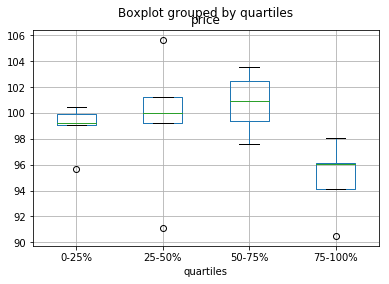

In [81]:

df['quartiles'] = pd.qcut( df['stratifying_var'], 4, labels=['0-25%', '25-50%', '50-75%', '75-100%'])


df.boxplot(column='price', by='quartiles')
